In [1]:
# !pip show scikit-learn
# !pip install --upgrade scikit-learn
# !pip install seaborn
!pip install --upgrade scikit-learn


In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

Data Preprocessing 

In [4]:
train.shape
train = train.drop(columns=['ID'])

In [5]:
train[train == '?'] = np.nan  # Replace '?' with NaN for missing data
train.isna().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            40
Class/ASD            0
dtype: int64

Box plots for different Attributes


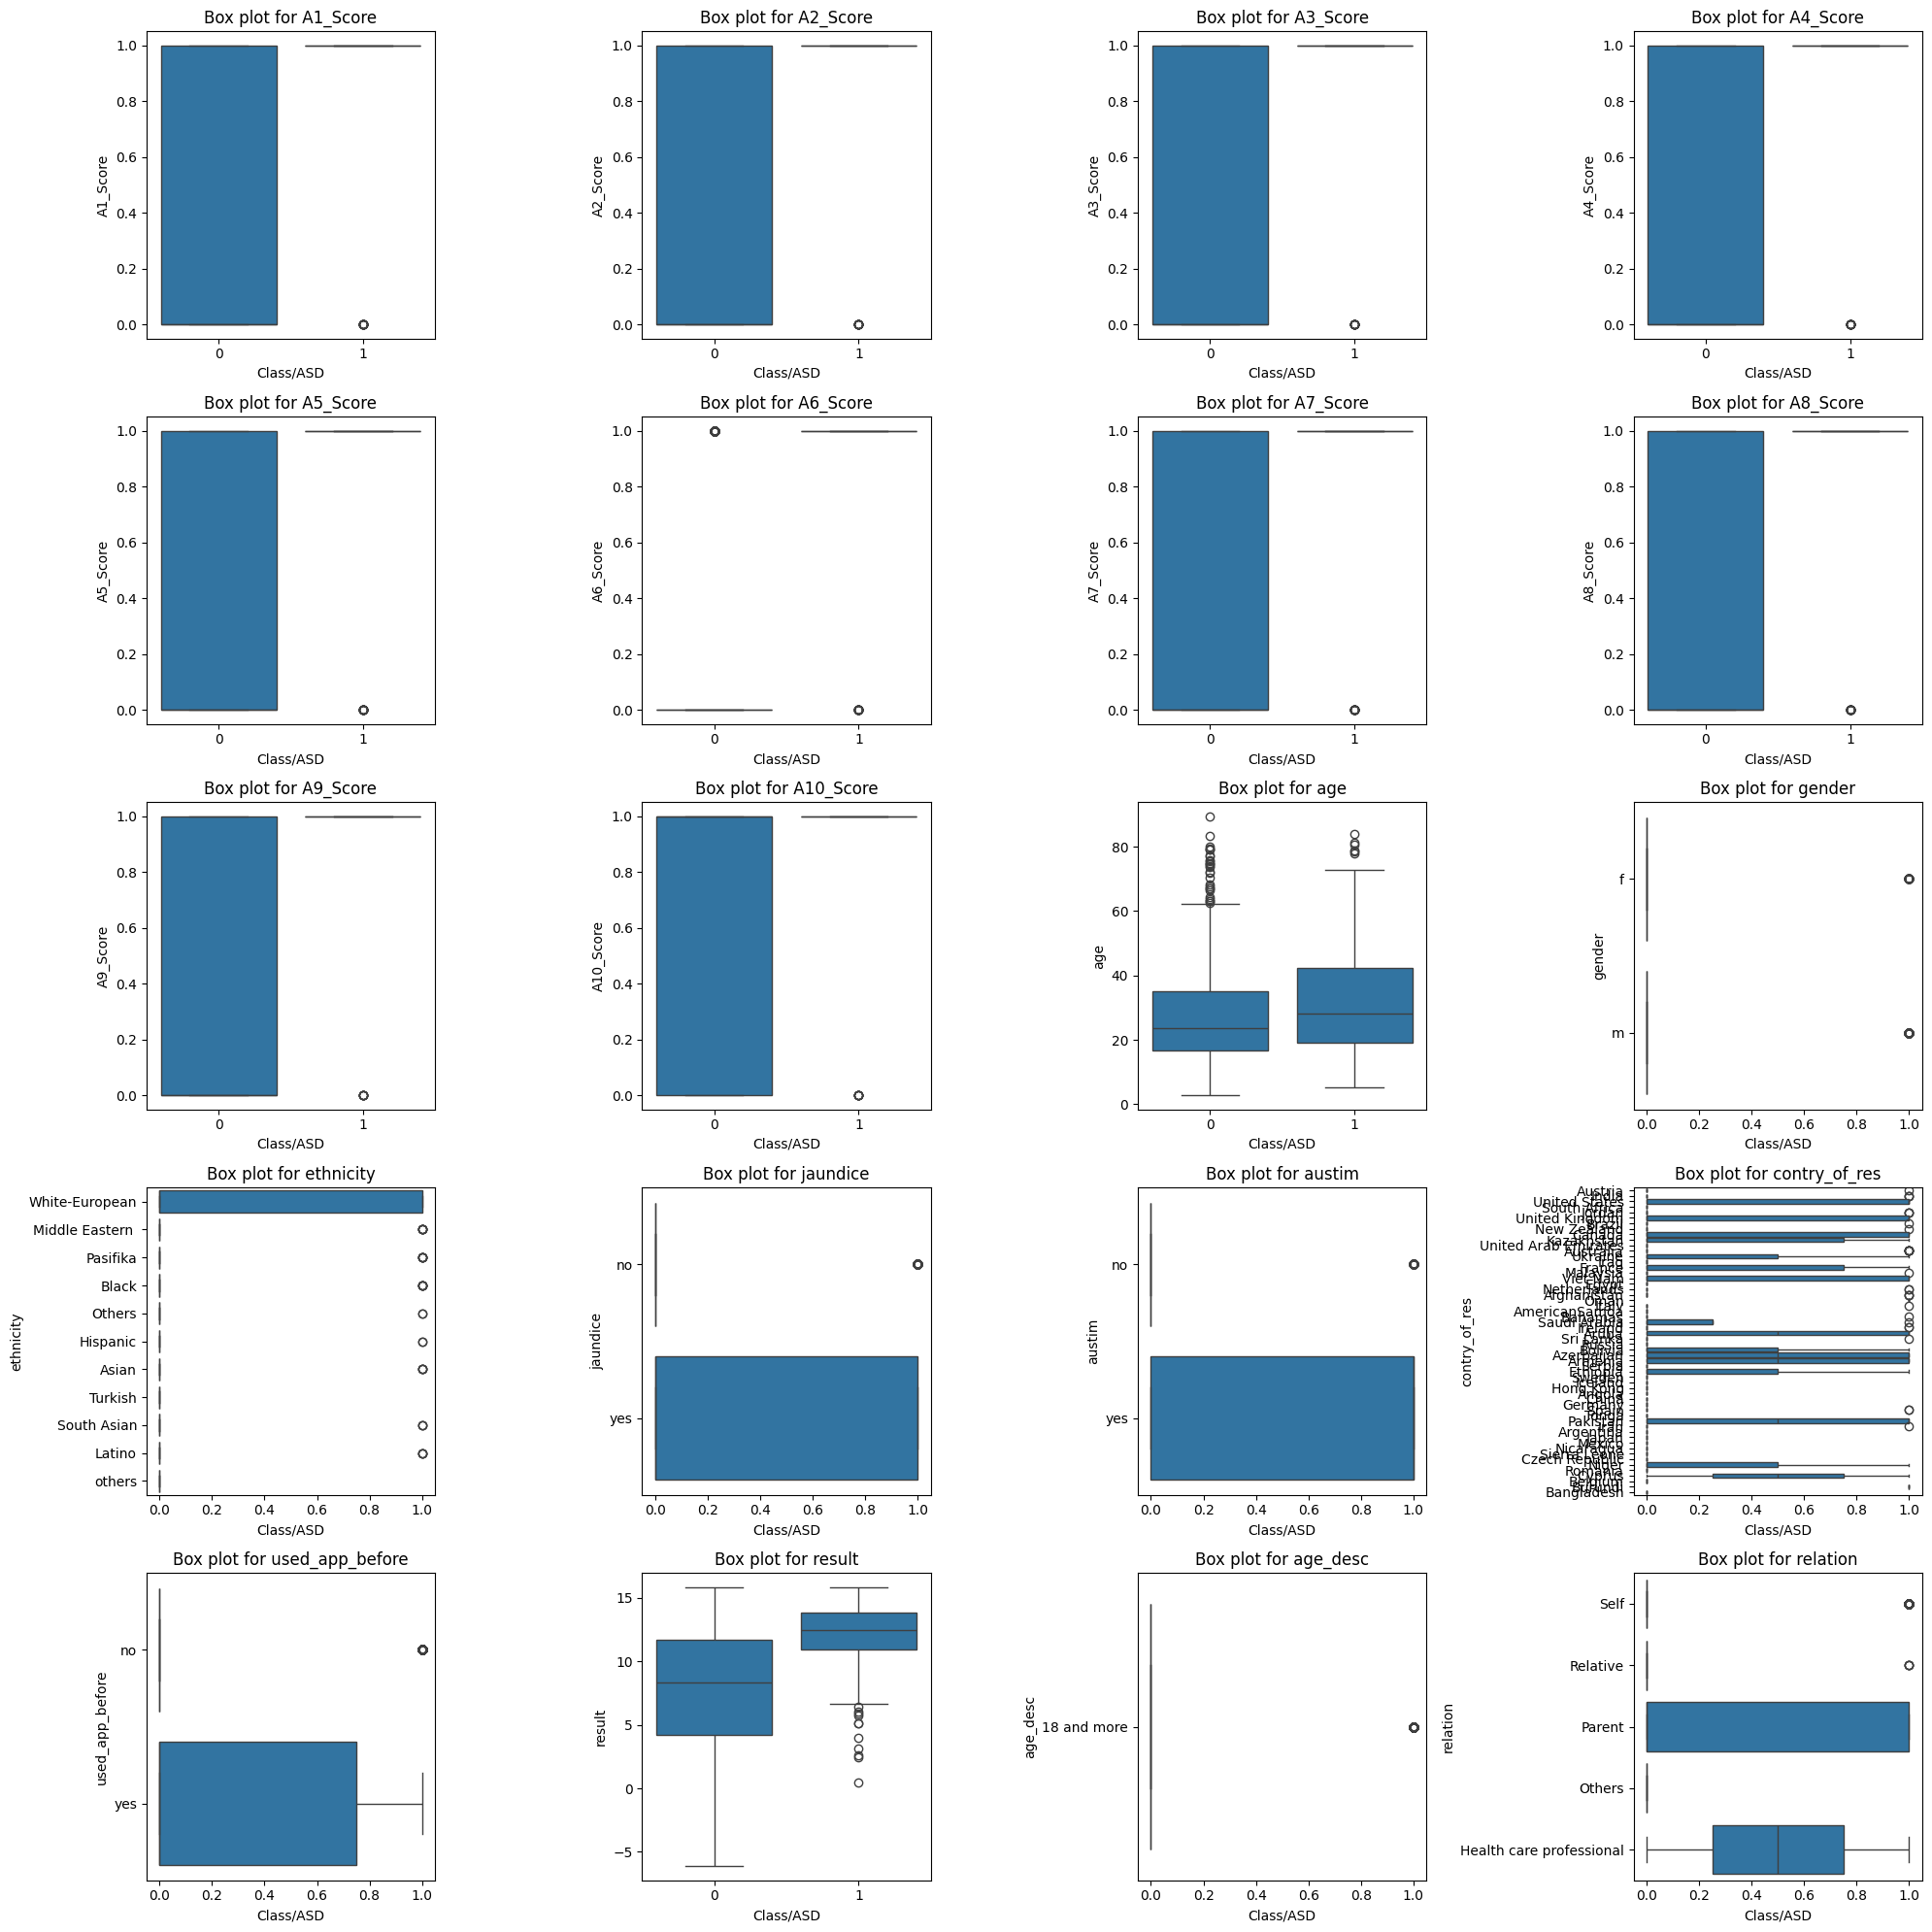

In [6]:
import seaborn as sns
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Columns to plot (excluding the last column 'Class/ASD')
columns_to_plot = train.columns[:-1]

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Class/ASD', y=column, data=train, ax=axes[i])
    axes[i].set_title(f'Box plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Dropping unnecessary attributes

In [7]:
train = train.drop(columns=['relation'])
train = train.drop(columns=['ethnicity'])
train = train.drop(columns=['age_desc'])
train = train.drop(columns=['used_app_before'])
print(train.dtypes)

A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
age              float64
gender            object
jaundice          object
austim            object
contry_of_res     object
result           float64
Class/ASD          int64
dtype: object


Label Encoding


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for col in train.columns:
    train.loc[:, col] = le.fit_transform(train[col])

# Convert all columns to int64
train = train.astype('int64')

# Check the data types after transformation
print(train.dtypes)





A1_Score         int64
A2_Score         int64
A3_Score         int64
A4_Score         int64
A5_Score         int64
A6_Score         int64
A7_Score         int64
A8_Score         int64
A9_Score         int64
A10_Score        int64
age              int64
gender           int64
jaundice         int64
austim           int64
contry_of_res    int64
result           int64
Class/ASD        int64
dtype: object


In [9]:
from scipy import stats
from sklearn.impute import SimpleImputer

# Step 1: Remove outliers in 'age'
z_scores_age = np.abs(stats.zscore(train['age']))
train = train[(z_scores_age < 3)]  # Adjust the threshold as needed
train.info()


# Now, train_no_outliers should be ready for further processing or modeling


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   A1_Score       800 non-null    int64
 1   A2_Score       800 non-null    int64
 2   A3_Score       800 non-null    int64
 3   A4_Score       800 non-null    int64
 4   A5_Score       800 non-null    int64
 5   A6_Score       800 non-null    int64
 6   A7_Score       800 non-null    int64
 7   A8_Score       800 non-null    int64
 8   A9_Score       800 non-null    int64
 9   A10_Score      800 non-null    int64
 10  age            800 non-null    int64
 11  gender         800 non-null    int64
 12  jaundice       800 non-null    int64
 13  austim         800 non-null    int64
 14  contry_of_res  800 non-null    int64
 15  result         800 non-null    int64
 16  Class/ASD      800 non-null    int64
dtypes: int64(17)
memory usage: 106.4 KB


Train - Test Split

In [10]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Class/ASD'])
y = train['Class/ASD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


Scaling Using Standard Scaler


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




1.NaiveBayes - Algorithm

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model1 =   GaussianNB()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy of NaiveBayes: {accuracy1}')

Accuracy of NaiveBayes: 0.8458333333333333


Cross validation using GaussianNB

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
model1 = GaussianNB()


# Perform cross-validation
cv_scores = cross_val_score(model1, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Cross-Validation Scores: [0.7875  0.81875 0.85    0.84375 0.875  ]
Mean CV Score: 0.835
Standard Deviation of CV Scores: 0.029738443133425805


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a Gaussian Naive Bayes model
model1 = GaussianNB()

# Define the hyperparameters and their possible values
param_grid = {}  # Gaussian Naive Bayes doesn't have hyperparameters

# Create the GridSearchCV object
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred1 = best_model.predict(X_test)

# Evaluate accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy of Naive Bayes with Best Model: {accuracy1}')



Accuracy of Naive Bayes with Best Model: 0.8458333333333333


In [15]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix of NaiveBayes:')
print(cm1)



Confusion Matrix of NaiveBayes:
[[157  29]
 [  8  46]]


In [16]:
from sklearn.metrics import classification_report

# Classification report
report1 = classification_report(y_test, y_pred1)
print('Classification Report of NaiveBayes:')
print(report1)


Classification Report of NaiveBayes:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       186
           1       0.61      0.85      0.71        54

    accuracy                           0.85       240
   macro avg       0.78      0.85      0.80       240
weighted avg       0.88      0.85      0.85       240



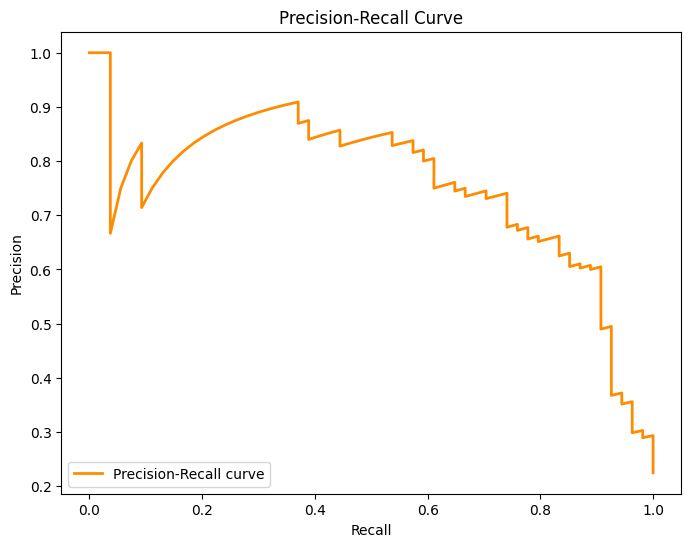

In [17]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


2. Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 29, criterion="entropy")
model2.fit(X_train, y_train) #--- 85%

RandomForestClassifier(criterion='entropy', n_estimators=29)

In [19]:
# from sklearn.ensemble import RandomForestClassifier
# model2 = RandomForestClassifier(n_estimators= 29, criterion="entropy")
# model2.fit(X_train, y_train) # 86%

In [20]:
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy of RFC with Best Model: {accuracy2}')

Accuracy of RFC with Best Model: 0.875


In [21]:
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion matrix of RFC:")
cm2

Confusion matrix of RFC:


array([[173,  13],
       [ 17,  37]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test, y_pred2)
print('Classification Report of RFC:')
print(report)

Classification Report of RFC:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       186
           1       0.74      0.69      0.71        54

    accuracy                           0.88       240
   macro avg       0.83      0.81      0.82       240
weighted avg       0.87      0.88      0.87       240



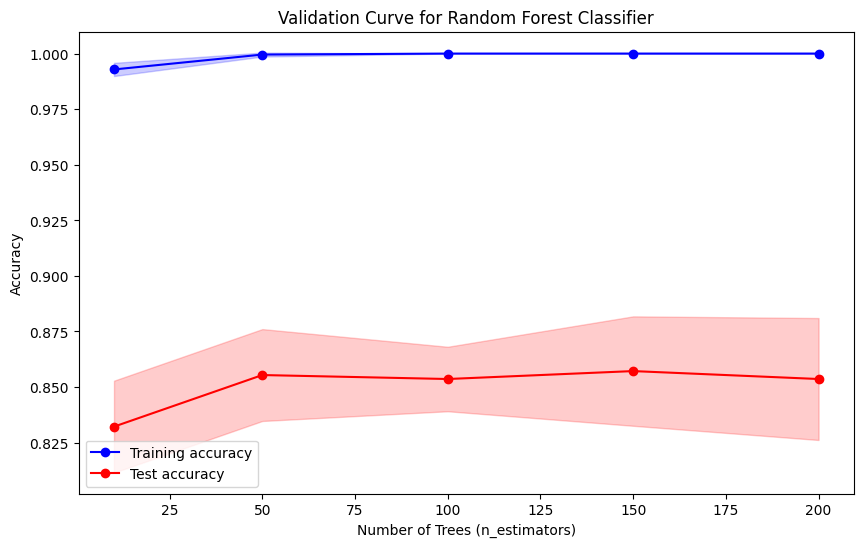

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve




# Define the hyperparameter values 
param_range = [10, 50, 100, 150, 200] 


# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Calculate validation scores using validation_curve
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curve for both training and test accuracy
plt.figure(figsize=(10, 6))

plt.plot(param_range, train_mean, label="Training accuracy", color="blue", marker="o")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(param_range, test_mean, label="Test accuracy", color="red", marker="o")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.title("Validation Curve for Random Forest Classifier")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


3.SVM - Algorithm

In [24]:
from sklearn.svm import SVC
model3 = SVC(kernel = "linear")
model3.fit(X_train, y_train)


SVC(kernel='linear')

In [25]:
#Predicting the test set result
y_pred3 = model3.predict(X_test)


In [26]:
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy of SVM with Best Model: {accuracy3}')

Accuracy of SVM with Best Model: 0.875


In [27]:
#Confusion matrix
print("Confusion matrix of SVM:")
cm3 = confusion_matrix(y_test,y_pred3)
cm3

Confusion matrix of SVM:


array([[171,  15],
       [ 15,  39]], dtype=int64)

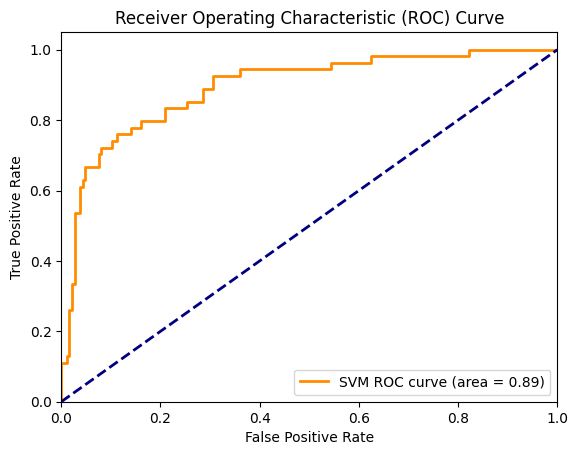

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

# Assuming X_train, y_train, X_test, and y_test are already defined

# Create and fit the SVM model
model3 = SVC(kernel="linear")
model3.fit(X_train, y_train)

# Predict probabilities
y_scores = model3.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'SVM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


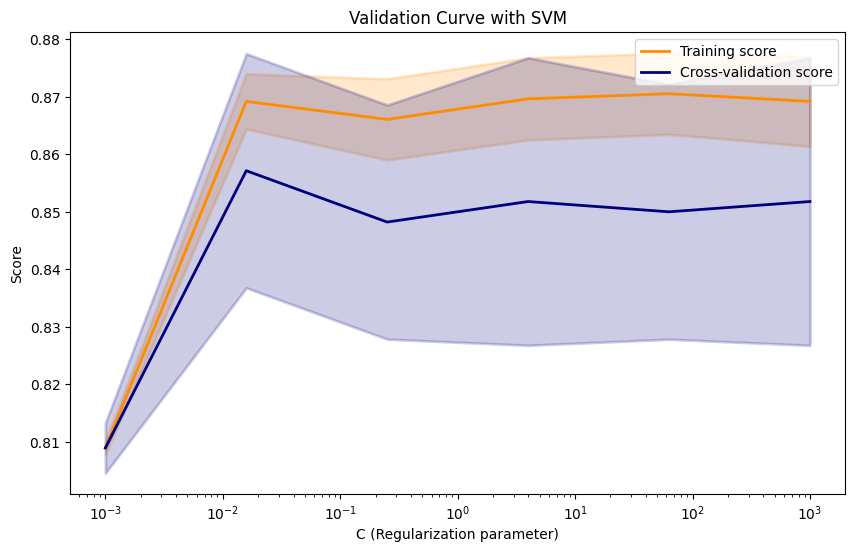

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

# Assuming X_train, y_train are already defined

# Define the hyperparameter values to be tested
param_range = np.logspace(-3, 3, 6)

# Create and fit the SVM model
model = SVC(kernel="linear")

# Plot validation curve
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="C", param_range=param_range,
    scoring="accuracy", cv=5
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVM")
plt.xlabel("C (Regularization parameter)")
plt.ylabel("Score")
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=2)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.show()



Considering All the three models - NaiveBayes,RFC,SVM

In [ ]:
print("Accuracy Scores:")
print("Accuracy of NaiveBayes:",accuracy1)
print("Accuracy of RandomForestClassifier:",accuracy2)
print("Accuracy of SVM:",accuracy3)


In [ ]:
report_model1 = classification_report(y_test, y_pred1)
print(f"Classification Report for Model NaiveBayes:\n{report_model1}")
print("------------------------------------------------------------------")


report_model2 = classification_report(y_test, y_pred2)
print(f"Classification Report for Model RFC:\n{report_model2}")

print("------------------------------------------------------------------")
report_model3 = classification_report(y_test, y_pred3)
print(f"Classification Report for Model SVM:\n{report_model3}")




In [ ]:
#ensemble methos
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Instantiate base models
model1 = GaussianNB()  # Naive Bayes
model2 = RandomForestClassifier()  # Random Forest
model3 = SVC(probability=True)  # Support Vector Machine with probability estimates

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[('nb', model1), ('rf', model2), ('svm', model3)],
    voting='soft'  # Choose 'hard' or 'soft' voting
)

# Fit the ensemble model on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = voting_classifier.predict(X_test)

# Print the classification report
print("Classification Report for Ensemble Model:")
print(classification_report(y_test, y_pred_ensemble))


Predicting test data


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_and_predict(test_data, model):
    # Create a DataFrame with the provided test data
    test_df = pd.DataFrame([test_data], columns=[
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
        'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
        'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'result', 'age_desc', 'relation', 'Class/ASD'
    ])

    # Drop unwanted columns
    columns_to_drop = test_df.columns.difference([
        'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
        'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
        'age', 'gender', 'jaundice', 'austim', 'contry_of_res', 'result'
    ])
    test_df = test_df.drop(columns=columns_to_drop)
    print(test_df)
    # Label Encoding for categorical columns
    label_encode_cols = ['gender', 'jaundice', 'austim', 'contry_of_res']
    label_encoder = LabelEncoder()
   

    for col in label_encode_cols:
        test_df[col] = label_encoder.fit_transform(test_df[col])

    # Convert to int64
    test_df[label_encode_cols] = test_df[label_encode_cols].astype('int64')

    # Standard Scaling for numerical columns
    standard_scale_cols = ['age', 'result']
    scaler = StandardScaler()
    test_df[standard_scale_cols] = scaler.fit_transform(test_df[standard_scale_cols])

    # Check if the model is fitted, and if not, fit it
    if not hasattr(model, 'classes_'):
        # Replace the following line with your actual training data and labels
        

        model.fit(X_train, y_train)

    # Make predictions using the provided model
    predictions = model.predict(test_df)

    return predictions

#test_values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7.380373076, 'm','White-European', 'no', 'yes', 'United States', 'no', 14.85148447, '18 and more', 'Self', 1]
test_values = [1,1,0,1,1,1,0,1,1,1,23.73476684,'m','Hispanic','no','no','India','no',6.495259913,'18 and more','Self',0]
result = preprocess_and_predict(test_values, model3)


print("Result :", result)



Saving the model


In [ ]:
#command to save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model3,open(filename,'wb'))

In [ ]:
load_model =  pickle.load(open(filename,'rb'))


In [ ]:
# a1 = load_model.predict([[1,1,1,1,1,1,1,1,1,1,123,0	,0,1,54,747]]) 
a2 = load_model.predict([[1,1,1,1,1,1,1,1,1,1,130,0,0,0,35,666]])
a3 = load_model.predict([[1,1,0,1,1,1,0,1,1,1,23.734767,0,0,0,54,6.66]])
print(a2)